# Model

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
from imblearn.over_sampling import SMOTE

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_pickle('dataframe.pkl')

In [3]:
df.head()

,population,growth,households,median_age,per_cap_income,hh_income,labor_force,unempl_rate,poverty_rate,hs_rate,college_rate,close_elect
0,55504.0,1.7,20800.0,37.8,39721.0,54487.0,25909.0,3.9,13.5,87.6,24.6,0
1,212628.0,16.7,75149.0,42.3,41286.0,56460.0,91567.0,4.0,11.7,90.0,29.5,0
2,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,8236.0,5.9,29.9,73.8,12.9,1
3,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,8506.0,4.4,20.1,80.7,12.0,0
4,58013.0,1.2,20619.0,40.8,31470.0,47213.0,24494.0,4.0,14.1,80.0,13.0,0


In [4]:
# drop rows with nans

df = df.dropna()

In [146]:
# inspect mean values of features for not-close vs close outcomes

df.groupby('close_elect').mean()

,population,growth,households,median_age,per_cap_income,hh_income,labor_force,unempl_rate,poverty_rate,hs_rate,college_rate
close_elect,,,,,,,,,,,
0,96130.213511,0.654778,34849.730837,41.203920,40616.088554,49092.827791,47259.882744,4.601295,15.904970,85.634162,20.188939
1,200647.364865,2.259009,71924.959459,39.253604,42160.738739,53460.472973,100270.324324,4.683333,15.774775,87.963514,26.509910


In [5]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Model Preprocessing
- Calculate null accuracy
- Define feature matrix and response vector
- Split data into test/train
- Scale feature (X) matricies

In [6]:
# check test accuracy
# confusion matrix - precision, recall, accuracy
# feature importance
# future use of model, predictions
# look where model fails
# cost of being wrong for FP and FN
# logistic regression assumes normal distribution?

In [7]:
# null model accuracy - guess '0' every time

(df['close_elect'] == 0).sum() / len(df)

0.9278986683988308

In [8]:
# initialize feature matrix and observed outcome

X = df.iloc[:, 0:11]
y = df.iloc[:, 11]

In [9]:
# test/train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## class weights

#class_weights="balanced"?

## smote
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

In [39]:
# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# transform train data
X_train_trans = scaler.transform(X_train)
X_train_trans = pd.DataFrame(X_train_trans)

# transform test data
X_test_trans = scaler.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans)

In [40]:
# set up stratified kfold
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)

## PCA

In [105]:
X_train_pca.mean()

population        1.367677e-10
growth            1.549676e-16
households        1.086498e-10
median_age       -5.045843e-14
per_cap_income    6.671597e-12
hh_income         5.597929e-12
labor_force      -1.717936e-10
unempl_rate      -5.028203e-15
poverty_rate     -7.657705e-15
hs_rate           4.802675e-14
college_rate     -1.451090e-14
dtype: float64

In [100]:
# center data on the train mean

train_center = X_train.mean()

X_train_pca = X_train - train_center
X_test_pca = X_test - train_center

In [161]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca=  scaler.fit_transform(X_test)

In [162]:
import seaborn as sns

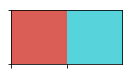

In [163]:
y_colors = sns.color_palette("hls", 2)
sns.palplot(y_colors)

In [164]:
from sklearn import decomposition

In [178]:
def plot_PCA_2D(data, target):

    pca = decomposition.PCA(n_components=2)
    pca.fit(data)
    pcafeatures = pca.transform(data)
    
    target_labels = target.unique()
    
    print(pca.components_)
    
    for i, label in enumerate(target_labels):
        plt.scatter(pcafeatures[target == i, 0], pcafeatures[target == i, 1],
                   c=y_colors[i], label=label, alpha=.5, edgecolors="none")
    xlabel("1st pricinple component")
    ylabel("2nd pricinple component")
    legend()

[[ 0.29083975  0.26777313  0.29670554 -0.06590397  0.33584415  0.39571416
   0.29830072 -0.22800288 -0.33129967  0.29395867  0.38054104]
 [ 0.46660456 -0.02518019  0.46033196 -0.18900627 -0.16129138 -0.18747121
   0.45873311  0.24348931  0.32228015 -0.3006861  -0.09411249]]


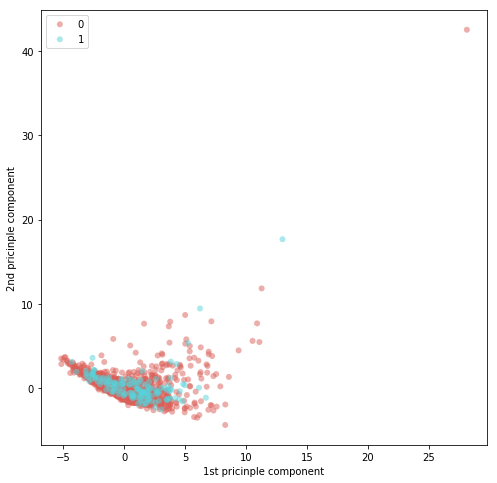

In [179]:
figsize(8,8)
plot_PCA_2D(X_train_pca, y_train)

In [177]:
# hunt down outlier

out_i = np.argmax(X_train_pca[:,0])

X_train.iloc[out_i,:]

population        10163507.0
growth                   3.5
households         3281845.0
median_age              35.8
per_cap_income       55624.0
hh_income            61308.0
labor_force        5123933.0
unempl_rate              4.7
poverty_rate            16.3
hs_rate                 77.7
college_rate            30.8
Name: 202, dtype: float64

## KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

In [77]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

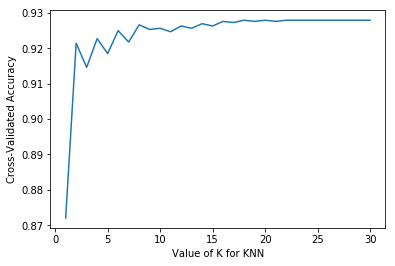

In [78]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [ ]:
# grid search?

## Logistic Regression Model

In [130]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train_trans, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [131]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test_trans)

In [132]:
# calculate model accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
metrics.precision_score(y_test, y_pred_class)

0.724025974025974


0.16487455197132617

### Logistic Regression Confusion Matrix

In [133]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
confusion

array([[623, 233],
       [ 22,  46]])

In [134]:
# confusion matrix output
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [135]:
# Classification Accuracy

print((TP + TN) / float(TP + TN + FP + FN))

0.724025974025974


In [136]:
# Classification Error (Misclasification)

print((FP + FN) / float(TP + TN + FP + FN))

0.275974025974026


In [137]:
# Sensitivity (Recall)

print(metrics.recall_score(y_test, y_pred_class))

0.6764705882352942


In [138]:
# Specificity

print(TN / float(TN + FP))

0.727803738317757


In [139]:
# False Positive Rate

print(FP / float(TN + FP))

0.272196261682243


In [140]:
# Precision

print(TP / float(TP + FP))

0.16487455197132617


In [152]:
y_predict = logreg.predict_proba(X_test_trans)

Text(0,0.5,'Frequency')

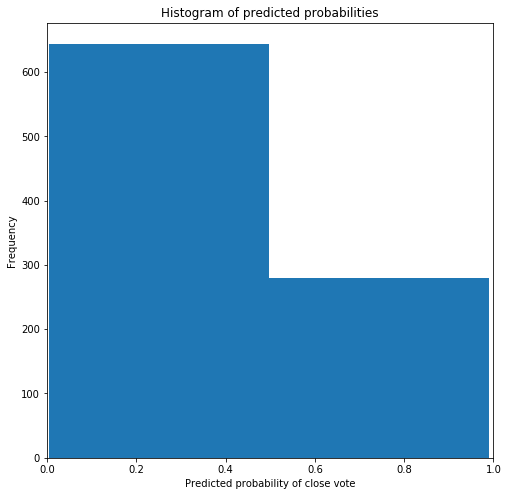

In [142]:
# histogram of predicted probabilities

y_pred_prob = logreg.predict_proba(X_test_trans)[:, 1]

plt.hist(y_pred_prob, bins=2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of close vote')
plt.ylabel('Frequency')

### ROC and AUC

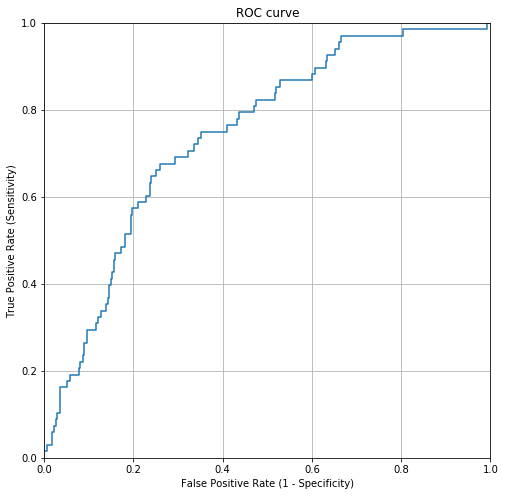

In [143]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [144]:
# AUC value

print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7446227322704783


### Precision-Recall Curve

In [160]:
size(y_predict)

1848

In [155]:
from  sklearn.metrics import precision_recall_curve

p,r,t=precision_recall_curve(y_test, y_predict[1])

# adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])

plt.plot(p,t)
plt.plot(r,t);
plt.title('Precision Recall Curve');

ValueError: Found input variables with inconsistent numbers of samples: [924, 2]

## Random Forest Model

In [147]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight="balanced")
random_forest.fit(X_train_trans, y_train)

#np.mean(model_selection.cross_val_score(random_forest, X_train, y_train, cv=kfold))
#np.mean(model_selection.cross_val_score(random_forest, X_test, y_test, cv=kfold))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [148]:
y_pred_rf = random_forest.predict(X_test_trans)

In [149]:
random_forest.score(X_test_trans, y_test)

0.9188311688311688

In [150]:
random_forest.feature_importances_

array([0.07429454, 0.09683311, 0.1072075 , 0.09149766, 0.09370172,
       0.0912801 , 0.08786329, 0.06226513, 0.07852573, 0.06750852,
       0.1490227 ])

In [151]:
list(zip(df.columns[0:-1], random_forest.feature_importances_))

[('population', 0.07429454180913446),
 ('growth', 0.09683310566296796),
 ('households', 0.10720749899685525),
 ('median_age', 0.0914976625652813),
 ('per_cap_income', 0.09370171516106529),
 ('hh_income', 0.09128010197344551),
 ('labor_force', 0.08786329463099721),
 ('unempl_rate', 0.06226512876934365),
 ('poverty_rate', 0.07852572796219451),
 ('hs_rate', 0.06750852001387413),
 ('college_rate', 0.14902270245484078)]

In [ ]:
# pca

# score on precision, *recall NOT accuracy
# train on recall -> show progress of models

# grid search

# upsample only on train, use smotes and weights

# groupby on classes and look at mean of features

In [74]:
len(X_test)

924

In [ ]:
#model_selection.GridSearchCV()